# Lab 05 Tasks

This task involves working with a small network which represents the train routes operated by Irish Rail (http://irishrail.ie). In this type of transport network, each node is a station, and an edge exists between two nodes if there is a route between the corresponding stations.

The dataset is represented via 2 plain text files:

1. *irish-rail-nodes.txt*: List of stations, each with a unique numeric index (indexed from 0).
2. *irish-rail-adjacency.txt*: Binary adjacency matrix representation for the network.

### Task 1

Load the two dataset files, so that:

1. The index-station name map is represented as a Python dictonary.
2. The adjacency matrix is represented as a NumPy matrix.

In [3]:
#Create Python Dict from Irish-Rail-Nodes Txt file
node_map = {}
fin = open("lab05-data/irish-rail-nodes.txt", "r")
for line in fin.readlines():
    parts = line.strip().split(" ", 1)
    index = int(parts[0])
    station = parts[1]
    node_map[index] = station
fin.close()
print("Read index for %d stations" % len(node_map))
print(", ".join(sorted(node_map.values())))

Read index for 22 stations
Athenry, Ballina, Belfast, Cobh, Cork, Dublin, Dundalk, Ennis, Galway, Gorey, Limerick, Longford, Mallow, Maynooth, Midleton, Nenagh, Port Laoise, Rosslare, Sligo, Tralee, Waterford, Westport


In [5]:
#Create Adjaceny Matrix as a NumPy Matrix
import numpy as np
A = np.loadtxt("lab05-data/irish-rail-adjacency.txt", delimiter=",")
A.shape

(22, 22)

### Task 2

From the data structures created in Task 1, create an appropriate NetworkX network to represent the data. Use station names as the node identifiers.

Hint: you can use the function *nx.relabel_nodes()* to re-label the identifers for all nodes in a network.

From this network, identify:

1. The hub stations in the rail network.
2. The peripheral stations in the rail network - i.e. those which are only accessible via a route from **one** other station.

In [7]:
import networkx as nx

g = nx.from_numpy_array(A)
list(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [8]:
g.is_directed()

False

In [9]:
#Rename Nodes to Station Names
g1 = nx.relabel_nodes(g, node_map)
list(g1.nodes())

['Athenry',
 'Ballina',
 'Belfast',
 'Cobh',
 'Cork',
 'Dublin',
 'Dundalk',
 'Ennis',
 'Galway',
 'Gorey',
 'Limerick',
 'Longford',
 'Mallow',
 'Maynooth',
 'Midleton',
 'Nenagh',
 'Port Laoise',
 'Rosslare',
 'Sligo',
 'Tralee',
 'Waterford',
 'Westport']

In [12]:
import pandas as pd
degs = dict(g1.degree())
degs_s = pd.Series(degs)

In [18]:
#Identify Hubs
degs_s[degs_s>=2].sort_values(ascending=False)

Dublin       16
Limerick      5
Cork          3
Galway        3
Cobh          2
Ennis         2
Mallow        2
Tralee        2
Waterford     2
dtype: int64

In [14]:
#Identify Peripheral Stations
degs_s[degs_s==1]

Athenry        1
Ballina        1
Belfast        1
Dundalk        1
Gorey          1
Longford       1
Maynooth       1
Midleton       1
Nenagh         1
Port Laoise    1
Rosslare       1
Sligo          1
Westport       1
dtype: int64

### Task 3

Visualise the adjacency matrix using a Seaborn *heatmap*, where the rows/columns are alphabetised.

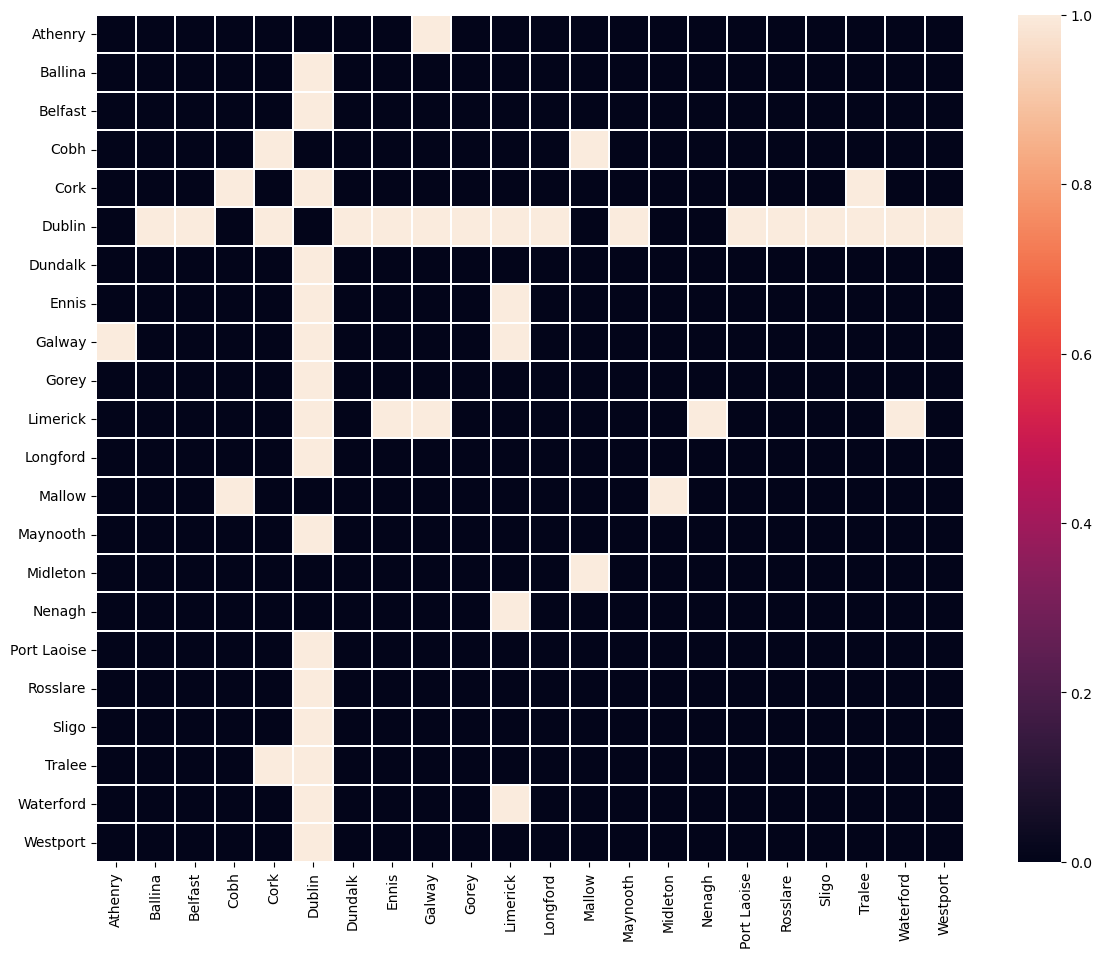

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Alphabetise Nodes
nodelist = sorted(node_map.values())
#Draw HeatMap with Seaborn
plt.figure(figsize=(14,11))
ax = sns.heatmap(A, linewidths=0.1, xticklabels=nodelist, yticklabels=nodelist)

### Task 4

Export the  network from Task 2 as a new GEXF file.

In [22]:
nx.write_gexf(g1, "irish-rail.gexf")

### Task 5

Load the GEXF file from Task 4 in *Gephi*, and complete the following steps:
    
1. Calculate the **degree** of the nodes.
2. Colour and scale the size of the nodes, ranked based on their **degree**.
3. Test different layout algorithms and parameter valuese to find a suitable layout for the network.
4. Use the *Preview* screen to adjust the final appearance of the network, and then export an image of the network as a PNG file.

In [ ]:
#See irish-rail.gephi